# ON26 PYTHON - Projeto Livre
## EcoLens: revelando disparidades ambientais
### Aluna: Nargylla Fernanda Cloviel Lima


#### Análise exploratória

##### Importando as bibliotecas necessárias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

definição dos datasets

In [3]:
df_desastres_e_sociedade = pd.read_csv("C:\\Users\\nargy\\Desktop\\Projeto final\\Desastres_e_sociedade.csv")
df_impactos_africa = pd.read_csv("C:\\Users\\nargy\\Desktop\\Projeto final\\Impactos_africa.csv")
df_mortalidade_agua = pd.read_csv("C:\\Users\\nargy\\Desktop\\Projeto final\\Mortalidade_agua_insalubre.csv") 

#### A análise exploratória será utilizada para responder os seguintes questionamentos:
- Quais países da África subsariana mais sofrem com problemas ambientais?
- Quais os problemas mais comuns nesses países?
- Qual a relação entre a % de terra arável com o estresse hídrico do país?
- Qual a relação entre a % de mulheres na agricultura e a % de terra disponível?
- As mulheres morrem mais por consumo de água imprópria e falta de higiene comparadas aos homens?
- As mulheres emigram mais do que os homens nessa região?

## Quais países da África subsariana mais sofrem com problemas ambientais?

In [4]:
#Quais países da África subsariana mais sofrem com problemas ambientais?
df_desastres_e_sociedade

,Unnamed: 0,Unnamed: 0_x,Year_x,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Country,ISO,Region,...,Unit,Symbol,Unnamed: 0_y,COUB,Place of birth,Education level,Age,Sex,Country of residence,Value_y
0,0,13285,2016,101,Natural,Hydrological,Flood,Ethiopia,ETH,Eastern Africa,...,%,E,510,ETH,Foreign-born,ISCED 3/4,25-64 years,Women,OECD - Total,22763
1,1,13285,2016,101,Natural,Hydrological,Flood,Ethiopia,ETH,Eastern Africa,...,%,E,513,ETH,All places of birth,ISCED 3/4,25-64 years,Women,OECD - Total,22763
2,2,13285,2016,101,Natural,Hydrological,Flood,Ethiopia,ETH,Eastern Africa,...,%,E,516,ETH,Foreign-born,Unknown education,25-64 years,Women,OECD - Total,1210
3,3,13285,2016,101,Natural,Hydrological,Flood,Ethiopia,ETH,Eastern Africa,...,%,E,519,ETH,All places of birth,Unknown education,25-64 years,Women,OECD - Total,1210
4,4,13285,2016,101,Natural,Hydrological,Flood,Ethiopia,ETH,Eastern Africa,...,%,E,522,ETH,Foreign-born,ISCED 0/1/2,25-64 years,Women,OECD - Total,12976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9093,9093,16070,2020,110,Natural,Hydrological,Flood,Zambia,ZMB,Eastern Africa,...,%,E,5679,ZMB,All places of birth,ISCED 0/1/2,All ages,Women,OECD - Total,2942
9094,9094,16070,2020,110,Natural,Hydrological,Flood,Zambia,ZMB,Eastern Africa,...,%,E,5682,ZMB,Foreign-born,ISCED 5/6,All ages,Women,OECD - Total,8132
9095,9095,16070,2020,110,Natural,Hydrological,Flood,Zambia,ZMB,Eastern Africa,...,%,E,5685,ZMB,All places of birth,ISCED 5/6,All ages,Women,OECD - Total,8132
9096,9096,16070,2020,110,Natural,Hydrological,Flood,Zambia,ZMB,Eastern Africa,...,%,E,5688,ZMB,Foreign-born,All levels of education,All ages,Women,OECD - Total,18191


In [5]:
df_desastres_e_sociedade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9098 entries, 0 to 9097
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            9098 non-null   int64  
 1   Unnamed: 0_x          9098 non-null   int64  
 2   Year_x                9098 non-null   int64  
 3   Seq                   9098 non-null   int64  
 4   Disaster Group        9098 non-null   object 
 5   Disaster Subgroup     9098 non-null   object 
 6   Disaster Type         9098 non-null   object 
 7   Country               9098 non-null   object 
 8   ISO                   9098 non-null   object 
 9   Region                9098 non-null   object 
 10  Continent             9098 non-null   object 
 11  End Year              9098 non-null   int64  
 12  Total Deaths          7032 non-null   float64
 13  VariableGroup         9098 non-null   object 
 14  Subgroup              9098 non-null   object 
 15  Variable             

Verificando os tipos mais comuns de desastres ambientais

In [6]:
df_desastres_e_sociedade.value_counts("Disaster Subgroup")

Disaster Subgroup
Hydrological      5310
Biological        1558
Meteorological    1278
Climatological     872
Geophysical         80
Name: count, dtype: int64

In [7]:
#Verificando a quantidade de desastres por países
df_desastres_paises = df_desastres_e_sociedade.value_counts("Country")
df_desastres_paises

Country
Uganda                      1000
Nigeria                     1000
Kenya                        800
Mozambique                   760
South Africa                 720
Rwanda                       680
Madagascar                   600
Angola                       600
Ethiopia                     600
Somalia                      560
Ghana                        400
Central African Republic     280
Zimbabwe                     280
Burkina Faso                 266
Zambia                       240
Senegal                      160
Lesotho                      152
Name: count, dtype: int64

Os desastres correspondem ao período de 2016 - 2021

In [8]:
df_desastres_e_sociedade.value_counts("Year_x")

Year_x
2019    2358
2020    1790
2016    1396
2017    1356
2018    1120
2021    1078
Name: count, dtype: int64

In [9]:
#Selecionando os 12 países com mais desastres
df_des_paises_prin = df_desastres_paises.head(12)
df_des_paises_prin

Country
Uganda                      1000
Nigeria                     1000
Kenya                        800
Mozambique                   760
South Africa                 720
Rwanda                       680
Madagascar                   600
Angola                       600
Ethiopia                     600
Somalia                      560
Ghana                        400
Central African Republic     280
Name: count, dtype: int64

In [10]:
# Dos 12 selecionados, vendo os tipos de desastres que ocorreram
paises_top12 = ["Uganda", "Nigeria", "Kenya", "Mozambique", "South Africa", "Rwanda", "Madagascar", "Angola", "Ethiopia", "Somalia", "Ghana", "Central African Republic"]
df_top12 = df_desastres_e_sociedade[df_desastres_e_sociedade["Country"].isin(paises_top12)]
resultado = df_top12.groupby(["Country", "Disaster Subgroup"]).size().reset_index(name="contagem") #ajustando o index para a formação de um novo dataframe
print(resultado)

                     Country Disaster Subgroup  contagem
0                     Angola        Biological        40
1                     Angola    Climatological        40
2                     Angola      Hydrological       520
3   Central African Republic        Biological       120
4   Central African Republic      Hydrological       120
5   Central African Republic    Meteorological        40
6                   Ethiopia        Biological       160
7                   Ethiopia    Climatological        40
8                   Ethiopia      Hydrological       400
9                      Ghana        Biological        40
10                     Ghana      Hydrological       320
11                     Ghana    Meteorological        40
12                     Kenya        Biological       240
13                     Kenya    Climatological       120
14                     Kenya      Hydrological       440
15                Madagascar        Biological        80
16                Madagascar   

In [11]:
#Fazendo um novo dataframe para entender qual é o desastre mais comum
df_resultado = pd.DataFrame(resultado)
df_resultado

,Country,Disaster Subgroup,contagem
0,Angola,Biological,40
1,Angola,Climatological,40
2,Angola,Hydrological,520
3,Central African Republic,Biological,120
4,Central African Republic,Hydrological,120
5,Central African Republic,Meteorological,40
6,Ethiopia,Biological,160
7,Ethiopia,Climatological,40
8,Ethiopia,Hydrological,400
9,Ghana,Biological,40


In [12]:
df_resultado.value_counts("Disaster Subgroup")

Disaster Subgroup
Hydrological      12
Biological        10
Meteorological     9
Climatological     7
Geophysical        2
Name: count, dtype: int64

### Vizualização dos dados

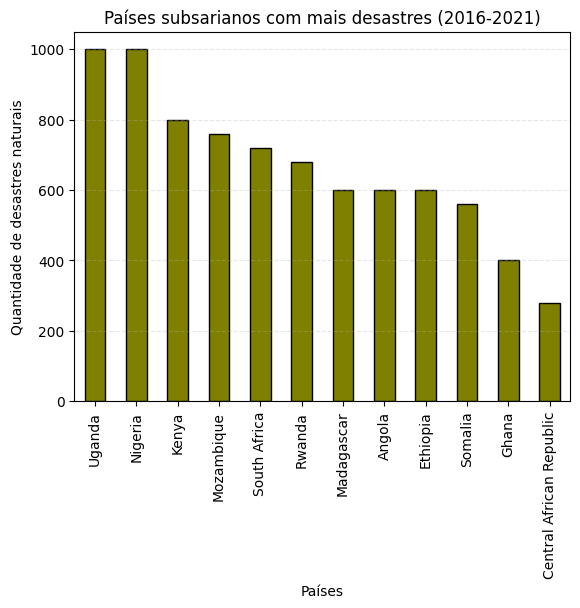

In [13]:
#Quais países da África subsariana mais sofrem com problemas ambientais?
cont_paises= df_desastres_paises.head(12)
cont_paises.plot(kind= "bar", edgecolor="black", color="#808000")
plt.xlabel("Países")
plt.ylabel("Quantidade de desastres naturais")
plt.yticks(np.arange(0, 1100, 200))
plt.title("Países subsarianos com mais desastres (2016-2021)")
plt.grid(axis= 'y', linestyle = '--', alpha = 0.3)
plt.show()

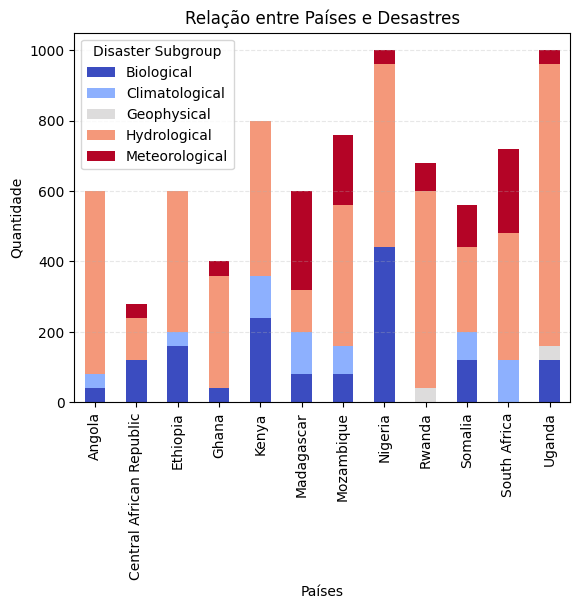

In [14]:
#-Quais os problemas mais comuns nesses países?
df_pivot = df_resultado.pivot_table(index="Country", columns="Disaster Subgroup", values="contagem")
df_pivot.plot(kind="bar", stacked=True, colormap= "coolwarm")
plt.xlabel("Países")
plt.ylabel("Quantidade")
plt.grid(axis= 'y', linestyle = '--', alpha = 0.3)
plt.title("Relação entre Países e Desastres")
plt.show()

## Qual a relação entre a % de terra arável com o estresse hídrico do país?

In [15]:
#Qual a relação entre a % de terra arável com o estresse hídrico do país?
df_impactos_africa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      50 non-null     int64  
 1   Unnamed: 0_x      50 non-null     int64  
 2   Country Name      50 non-null     object 
 3   Country Code_x    50 non-null     object 
 4   Indicator Name_x  50 non-null     object 
 5   Indicator Code_x  50 non-null     object 
 6   2016_x            50 non-null     float64
 7   2017_x            50 non-null     float64
 8   2018_x            50 non-null     float64
 9   2019_x            50 non-null     float64
 10  2020_x            50 non-null     float64
 11  Unnamed: 67       0 non-null      float64
 12  Unnamed: 0_y      50 non-null     int64  
 13  Country Code_y    50 non-null     object 
 14  Indicator Name_y  50 non-null     object 
 15  Indicator Code_y  50 non-null     object 
 16  2016_y            50 non-null     float64
 17 

In [16]:
#Selecionando o ano de 2021 para vê a % de terra agrária
paises_top12 = ["Uganda", "Nigeria", "Kenya", "Mozambique", "South Africa", "Rwanda", "Madagascar", "Angola", "Ethiopia", "Somalia", "Ghana", "Central African Republic"]
df_top12 = df_impactos_africa[df_impactos_africa["Country Name"].isin(paises_top12)]
resul_agric = df_top12.groupby(["Country Name", "2021_x"]).size().reset_index(name="contagem")
print(resul_agric)

                Country Name     2021_x  contagem
0                     Angola  36.814791         1
1   Central African Republic   7.881473         1
2                   Ethiopia  34.198106         1
3                      Ghana  55.393020         1
4                      Kenya  48.687493         1
5                 Madagascar  70.290478         1
6                 Mozambique  52.663893         1
7                    Nigeria  75.369193         1
8                     Rwanda  81.250912         1
9                    Somalia  70.343036         1
10              South Africa  79.417850         1
11                    Uganda  71.888091         1


In [17]:
#Tornando em dataframe para melhor vizualização
df_resul_agric = pd.DataFrame(resul_agric)
df_resul_agric

,Country Name,2021_x,contagem
0,Angola,36.814791,1
1,Central African Republic,7.881473,1
2,Ethiopia,34.198106,1
3,Ghana,55.393020,1
4,Kenya,48.687493,1
5,Madagascar,70.290478,1
6,Mozambique,52.663893,1
7,Nigeria,75.369193,1
8,Rwanda,81.250912,1
9,Somalia,70.343036,1


In [18]:
df_resul_agric = df_resul_agric.rename(columns={"Country Name": "Country"})
df_resul_agric

,Country,2021_x,contagem
0,Angola,36.814791,1
1,Central African Republic,7.881473,1
2,Ethiopia,34.198106,1
3,Ghana,55.393020,1
4,Kenya,48.687493,1
5,Madagascar,70.290478,1
6,Mozambique,52.663893,1
7,Nigeria,75.369193,1
8,Rwanda,81.250912,1
9,Somalia,70.343036,1


In [19]:
#Fazendo a análise do estresse hídrico
df_estresse_hidr = df_desastres_e_sociedade[df_desastres_e_sociedade["Year_x"] == 2021]
df_estresse_hidr

,Unnamed: 0,Unnamed: 0_x,Year_x,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Country,ISO,Region,...,Unit,Symbol,Unnamed: 0_y,COUB,Place of birth,Education level,Age,Sex,Country of residence,Value_y
560,560,15269,2021,9546,Natural,Climatological,Drought,Ethiopia,ETH,Eastern Africa,...,%,E,510,ETH,Foreign-born,ISCED 3/4,25-64 years,Women,OECD - Total,22763
561,561,15269,2021,9546,Natural,Climatological,Drought,Ethiopia,ETH,Eastern Africa,...,%,E,513,ETH,All places of birth,ISCED 3/4,25-64 years,Women,OECD - Total,22763
562,562,15269,2021,9546,Natural,Climatological,Drought,Ethiopia,ETH,Eastern Africa,...,%,E,516,ETH,Foreign-born,Unknown education,25-64 years,Women,OECD - Total,1210
563,563,15269,2021,9546,Natural,Climatological,Drought,Ethiopia,ETH,Eastern Africa,...,%,E,519,ETH,All places of birth,Unknown education,25-64 years,Women,OECD - Total,1210
564,564,15269,2021,9546,Natural,Climatological,Drought,Ethiopia,ETH,Eastern Africa,...,%,E,522,ETH,Foreign-born,ISCED 0/1/2,25-64 years,Women,OECD - Total,12976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8693,8693,16096,2021,36,Natural,Meteorological,Storm,Zimbabwe,ZWE,Eastern Africa,...,%,E,5709,ZWE,All places of birth,ISCED 0/1/2,All ages,Women,OECD - Total,6698
8694,8694,16096,2021,36,Natural,Meteorological,Storm,Zimbabwe,ZWE,Eastern Africa,...,%,E,5712,ZWE,Foreign-born,ISCED 5/6,All ages,Women,OECD - Total,15920
8695,8695,16096,2021,36,Natural,Meteorological,Storm,Zimbabwe,ZWE,Eastern Africa,...,%,E,5715,ZWE,All places of birth,ISCED 5/6,All ages,Women,OECD - Total,15920
8696,8696,16096,2021,36,Natural,Meteorological,Storm,Zimbabwe,ZWE,Eastern Africa,...,%,E,5718,ZWE,Foreign-born,All levels of education,All ages,Women,OECD - Total,40870


In [20]:
#Selecionando os 12 países dos principais desastres naturais
paises_top12 = ["Uganda", "Nigeria", "Kenya", "Mozambique", "South Africa", "Rwanda", "Madagascar", "Angola", "Ethiopia", "Somalia", "Ghana", "Central African Republic"]
df_top12 = df_estresse_hidr[df_estresse_hidr["Country"].isin(paises_top12)]
estresse = df_top12.groupby(["Country", "Value_x", "Year_x"]).size().reset_index(name='contagem')
estresse

,Country,Value_x,Year_x,contagem
0,Angola,1.87,2021,80
1,Central African Republic,0.34,2021,40
2,Ethiopia,32.26,2021,40
3,Ghana,6.31,2021,40
4,Kenya,33.24,2021,160
5,Madagascar,11.26,2021,80
6,Mozambique,1.75,2021,80
7,Nigeria,9.67,2021,120
8,Rwanda,20.20,2021,80
9,Somalia,24.53,2021,80


In [21]:
df_estresse = pd.DataFrame(estresse)
df_estresse

,Country,Value_x,Year_x,contagem
0,Angola,1.87,2021,80
1,Central African Republic,0.34,2021,40
2,Ethiopia,32.26,2021,40
3,Ghana,6.31,2021,40
4,Kenya,33.24,2021,160
5,Madagascar,11.26,2021,80
6,Mozambique,1.75,2021,80
7,Nigeria,9.67,2021,120
8,Rwanda,20.20,2021,80
9,Somalia,24.53,2021,80


## Visualização de dados

In [22]:
df_unir = pd.merge(df_estresse, df_resul_agric, on="Country", how="outer")
df_unir

,Country,Value_x,Year_x,contagem_x,2021_x,contagem_y
0,Angola,1.87,2021,80,36.814791,1
1,Central African Republic,0.34,2021,40,7.881473,1
2,Ethiopia,32.26,2021,40,34.198106,1
3,Ghana,6.31,2021,40,55.393020,1
4,Kenya,33.24,2021,160,48.687493,1
5,Madagascar,11.26,2021,80,70.290478,1
6,Mozambique,1.75,2021,80,52.663893,1
7,Nigeria,9.67,2021,120,75.369193,1
8,Rwanda,20.20,2021,80,81.250912,1
9,Somalia,24.53,2021,80,70.343036,1


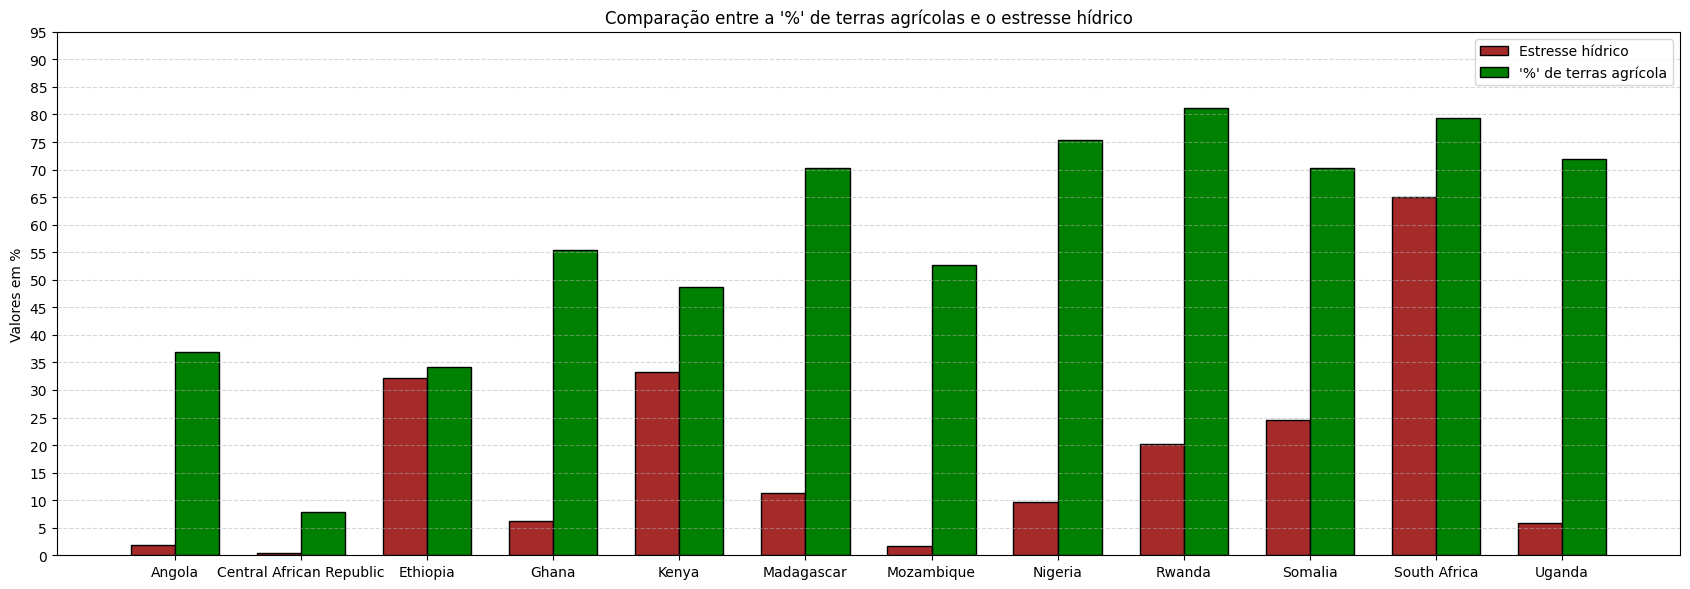

In [23]:
posicoes = range(len(df_unir))
largura = 0.35
fig, ax = plt.subplots(figsize=(17, 6))
barra1 = ax.bar(posicoes, df_unir["Value_x"], largura, label="Estresse hídrico", color = "brown", edgecolor = "black")
barra2 = ax.bar([p + largura for p in posicoes], df_unir["2021_x"], largura, label="'%' de terras agrícola", color = "green", edgecolor = "black")
ax.set_xticks([p + largura/2 for p in posicoes])
ax.set_xticklabels(df_unir["Country"])
ax.set_ylabel("Valores em %")
ax.set_title("Comparação entre a '%' de terras agrícolas e o estresse hídrico")
ax.legend()
plt.yticks(np.arange(0, 100, 5))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

## Qual a relação entre a % de mulheres na agricultura e a % de terra disponível?

In [24]:
df_impactos_africa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      50 non-null     int64  
 1   Unnamed: 0_x      50 non-null     int64  
 2   Country Name      50 non-null     object 
 3   Country Code_x    50 non-null     object 
 4   Indicator Name_x  50 non-null     object 
 5   Indicator Code_x  50 non-null     object 
 6   2016_x            50 non-null     float64
 7   2017_x            50 non-null     float64
 8   2018_x            50 non-null     float64
 9   2019_x            50 non-null     float64
 10  2020_x            50 non-null     float64
 11  Unnamed: 67       0 non-null      float64
 12  Unnamed: 0_y      50 non-null     int64  
 13  Country Code_y    50 non-null     object 
 14  Indicator Name_y  50 non-null     object 
 15  Indicator Code_y  50 non-null     object 
 16  2016_y            50 non-null     float64
 17 

In [25]:
paises_top12 = ["Uganda", "Nigeria", "Kenya", "Mozambique", "South Africa", "Rwanda", "Madagascar", "Ethiopia", "Somalia", "Ghana", "Central African Republic", "Angola"]
df_top12_fem = df_impactos_africa[df_impactos_africa["Country Name"].isin(paises_top12)]
agricu_fem = df_top12_fem.groupby(["Country Name", "2021_y"]).size().reset_index(name="contagem")
agricu_fem

,Country Name,2021_y,contagem
0,Angola,65.73271,1
1,Central African Republic,73.54604,1
2,Ethiopia,55.38612,1
3,Ghana,36.61125,1
4,Kenya,34.82787,1
5,Madagascar,71.78278,1
6,Mozambique,79.77885,1
7,Nigeria,24.63433,1
8,Rwanda,67.43399,1
9,Somalia,28.54901,1


In [26]:
paises_top12 = ["Uganda", "Nigeria", "Kenya", "Mozambique", "South Africa", "Rwanda", "Madagascar", "Angola", "Ethiopia", "Somalia", "Ghana", "Central African Republic"]
df_top12 = df_impactos_africa[df_impactos_africa["Country Name"].isin(paises_top12)]
resul_agric = df_top12.groupby(["Country Name", "2021_x"]).size().reset_index(name="contagem")
resul_agric

,Country Name,2021_x,contagem
0,Angola,36.814791,1
1,Central African Republic,7.881473,1
2,Ethiopia,34.198106,1
3,Ghana,55.393020,1
4,Kenya,48.687493,1
5,Madagascar,70.290478,1
6,Mozambique,52.663893,1
7,Nigeria,75.369193,1
8,Rwanda,81.250912,1
9,Somalia,70.343036,1


## Visualização de dados

In [27]:
df_uniao = pd.merge(agricu_fem, resul_agric, on= "Country Name", how = "outer")
df_uniao

,Country Name,2021_y,contagem_x,2021_x,contagem_y
0,Angola,65.73271,1,36.814791,1
1,Central African Republic,73.54604,1,7.881473,1
2,Ethiopia,55.38612,1,34.198106,1
3,Ghana,36.61125,1,55.393020,1
4,Kenya,34.82787,1,48.687493,1
5,Madagascar,71.78278,1,70.290478,1
6,Mozambique,79.77885,1,52.663893,1
7,Nigeria,24.63433,1,75.369193,1
8,Rwanda,67.43399,1,81.250912,1
9,Somalia,28.54901,1,70.343036,1


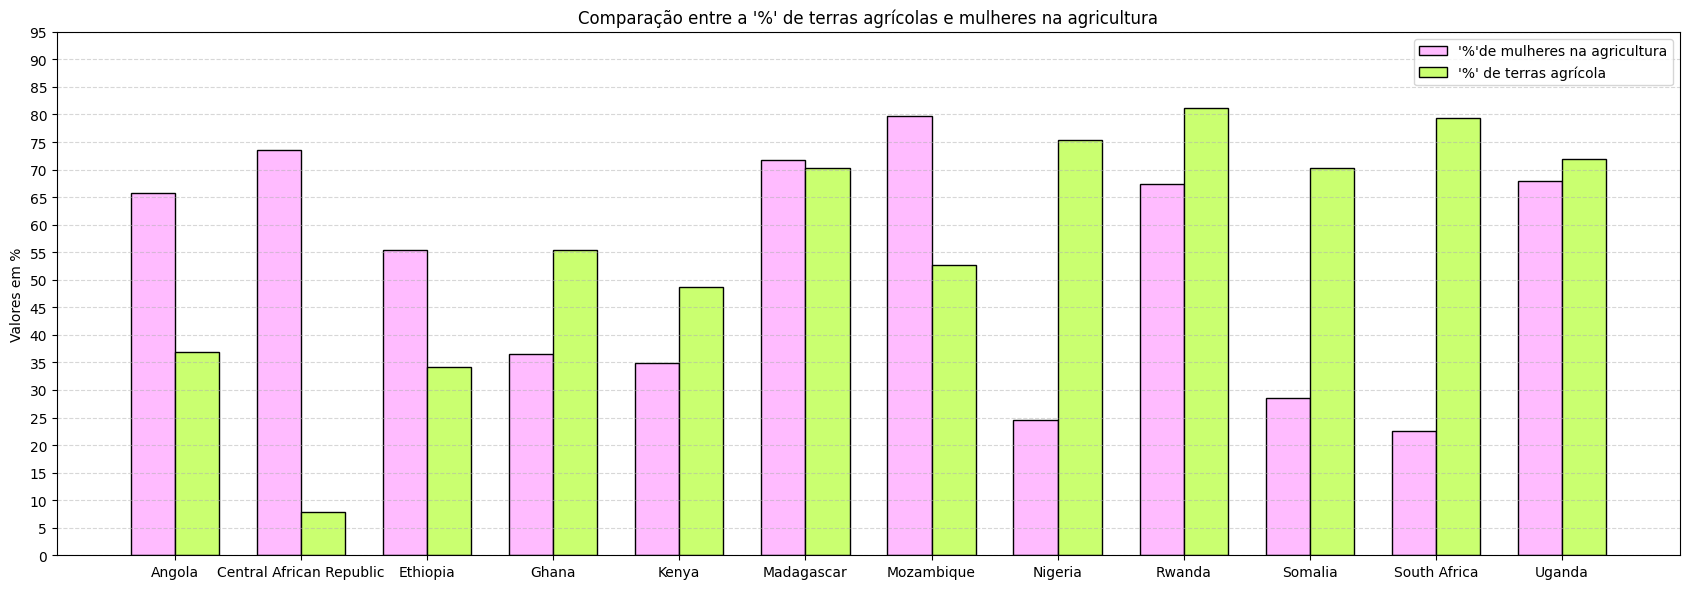

In [28]:
posicoes = range(len(df_uniao))
largura = 0.35
fig, ax = plt.subplots(figsize=(17, 6))
barra1 = ax.bar(posicoes, df_uniao["2021_y"], largura, label="'%'de mulheres na agricultura", color = "#FFBBFF", edgecolor = "black")
barra2 = ax.bar([p + largura for p in posicoes], df_uniao["2021_x"], largura, label="'%' de terras agrícola", color = "#CAFF70", edgecolor = "black")
ax.set_xticks([p + largura/2 for p in posicoes])
ax.set_xticklabels(df_uniao["Country Name"])
ax.set_ylabel("Valores em %")
ax.set_title("Comparação entre a '%' de terras agrícolas e mulheres na agricultura")
ax.legend()
plt.yticks(np.arange(0, 100, 5))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

#### Relação entre o estresse hídrico e a % de mulheres na agricultura

In [29]:
df_estresse1 = df_estresse.rename(columns={"Country": "Country Name"})
df_estresse1

,Country Name,Value_x,Year_x,contagem
0,Angola,1.87,2021,80
1,Central African Republic,0.34,2021,40
2,Ethiopia,32.26,2021,40
3,Ghana,6.31,2021,40
4,Kenya,33.24,2021,160
5,Madagascar,11.26,2021,80
6,Mozambique,1.75,2021,80
7,Nigeria,9.67,2021,120
8,Rwanda,20.20,2021,80
9,Somalia,24.53,2021,80


In [30]:
df_unir1 = pd.merge(df_uniao, df_estresse1, on= "Country Name", how = "outer")
df_unir1

,Country Name,2021_y,contagem_x,2021_x,contagem_y,Value_x,Year_x,contagem
0,Angola,65.73271,1,36.814791,1,1.87,2021,80
1,Central African Republic,73.54604,1,7.881473,1,0.34,2021,40
2,Ethiopia,55.38612,1,34.198106,1,32.26,2021,40
3,Ghana,36.61125,1,55.393020,1,6.31,2021,40
4,Kenya,34.82787,1,48.687493,1,33.24,2021,160
5,Madagascar,71.78278,1,70.290478,1,11.26,2021,80
6,Mozambique,79.77885,1,52.663893,1,1.75,2021,80
7,Nigeria,24.63433,1,75.369193,1,9.67,2021,120
8,Rwanda,67.43399,1,81.250912,1,20.20,2021,80
9,Somalia,28.54901,1,70.343036,1,24.53,2021,80


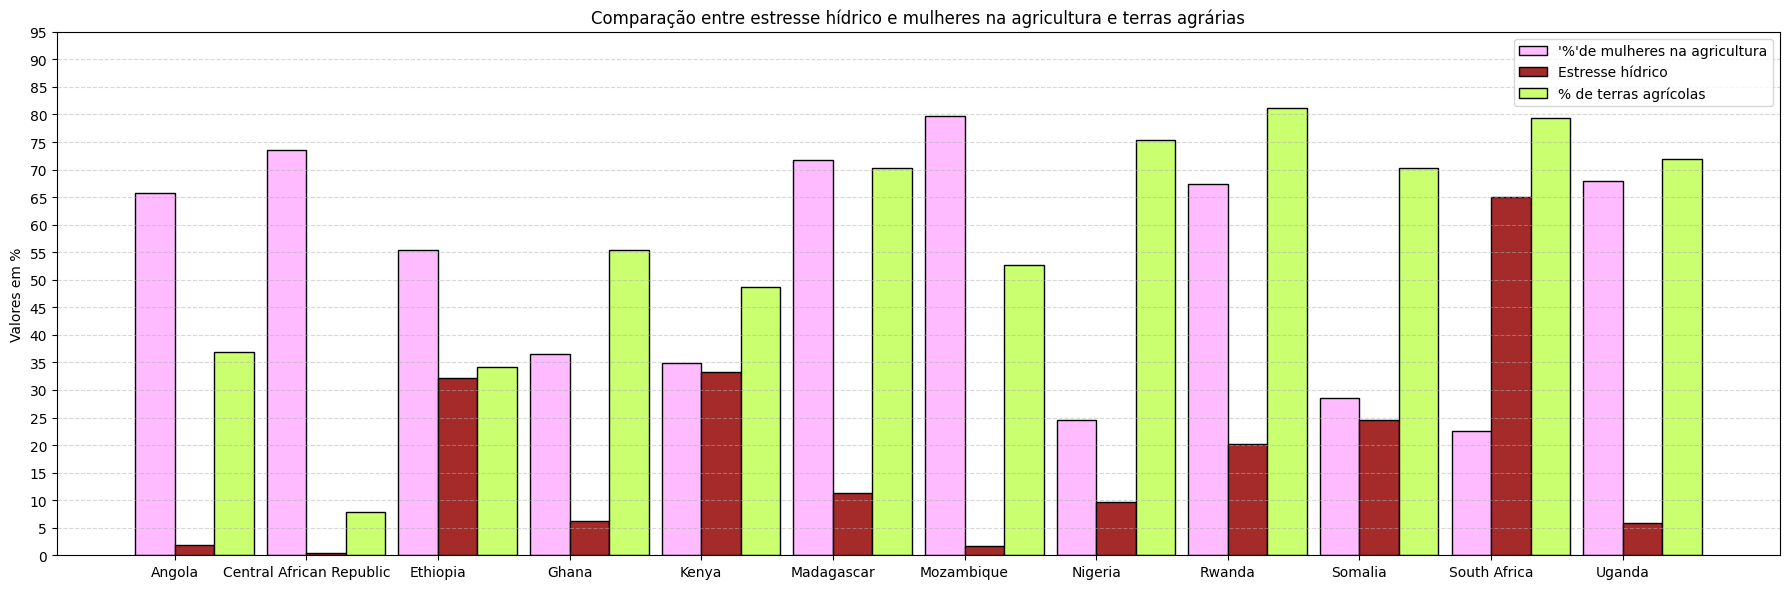

In [31]:
posicoes = range(len(df_unir1))
largura = 0.30
fig, ax = plt.subplots(figsize=(18, 6))
barra1 = ax.bar(posicoes, df_unir1["2021_y"], largura, label="'%'de mulheres na agricultura", color = "#FFBBFF", edgecolor = "black")
barra2 = ax.bar([p + largura for p in posicoes], df_unir1["Value_x"], largura, label="Estresse hídrico", color = "brown", edgecolor = "black")
barra3 = ax.bar([p + 2 * largura for p in posicoes], df_unir1["2021_x"], largura, label="% de terras agrícolas", color="#CAFF70", edgecolor="black")
ax.set_xticks([p + largura/2 for p in posicoes])
ax.set_xticklabels(df_uniao["Country Name"])
ax.set_ylabel("Valores em %")
ax.set_title("Comparação entre estresse hídrico e mulheres na agricultura e terras agrárias")
ax.legend()
plt.yticks(np.arange(0, 100, 5))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

### As mulheres morrem mais por consumo de água imprópria e falta de higiene comparadas aos homens?

In [32]:
df_mortalidade_agua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      462 non-null    int64  
 1   Indicator Name  462 non-null    object 
 2   Indicator Code  462 non-null    object 
 3   Country Name    462 non-null    object 
 4   Country Code    462 non-null    object 
 5   Year            462 non-null    int64  
 6   Value           462 non-null    float64
 7   Disaggregation  462 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 29.0+ KB


In [44]:
paises = ["Uganda", "Nigeria", "Kenya", "Mozambique", "South Africa", "Rwanda", "Madagascar", "Angola", "Ethiopia", "Somalia", "Ghana", "Central African Republic"]
df_top = df_mortalidade_agua[df_mortalidade_agua["Country Name"].isin(paises_top12)]
df_mort = df_top.groupby(["Country Name", "Value", "Disaggregation"]).size().reset_index(name="contagem")
df_mort

,Country Name,Value,Disaggregation,contagem
0,Angola,45.2,female,1
1,Angola,52.6,male,1
2,Central African Republic,74.7,female,1
3,Central African Republic,89.7,male,1
4,Ethiopia,40.8,female,1
5,Ethiopia,46.5,male,1
6,Ghana,18.2,male,1
7,Ghana,19.4,female,1
8,Kenya,49.7,female,1
9,Kenya,52.6,male,1


In [45]:
df_fem = df_mort["Disaggregation"] == "female"
df_mort_fem = df_mort[df_fem]
df_mort_fem

,Country Name,Value,Disaggregation,contagem
0,Angola,45.2,female,1
2,Central African Republic,74.7,female,1
4,Ethiopia,40.8,female,1
7,Ghana,19.4,female,1
8,Kenya,49.7,female,1
10,Madagascar,29.7,female,1
12,Mozambique,27.1,female,1
14,Nigeria,65.6,female,1
17,Rwanda,19.5,female,1
19,Somalia,89.7,female,1


In [46]:
df_masc = df_mort["Disaggregation"] == "male"
df_mort_masc = df_mort[df_masc]
df_mort_masc

,Country Name,Value,Disaggregation,contagem
1,Angola,52.6,male,1
3,Central African Republic,89.7,male,1
5,Ethiopia,46.5,male,1
6,Ghana,18.2,male,1
9,Kenya,52.6,male,1
11,Madagascar,30.8,male,1
13,Mozambique,28.2,male,1
15,Nigeria,71.6,male,1
16,Rwanda,19.2,male,1
18,Somalia,83.4,male,1


In [48]:
df_unio = pd.merge(df_mort_fem, df_mort_masc, on= "Country Name", how = "outer")
df_unio

,Country Name,Value_x,Disaggregation_x,contagem_x,Value_y,Disaggregation_y,contagem_y
0,Angola,45.2,female,1,52.6,male,1
1,Central African Republic,74.7,female,1,89.7,male,1
2,Ethiopia,40.8,female,1,46.5,male,1
3,Ghana,19.4,female,1,18.2,male,1
4,Kenya,49.7,female,1,52.6,male,1
5,Madagascar,29.7,female,1,30.8,male,1
6,Mozambique,27.1,female,1,28.2,male,1
7,Nigeria,65.6,female,1,71.6,male,1
8,Rwanda,19.5,female,1,19.2,male,1
9,Somalia,89.7,female,1,83.4,male,1


### Visualização de dados

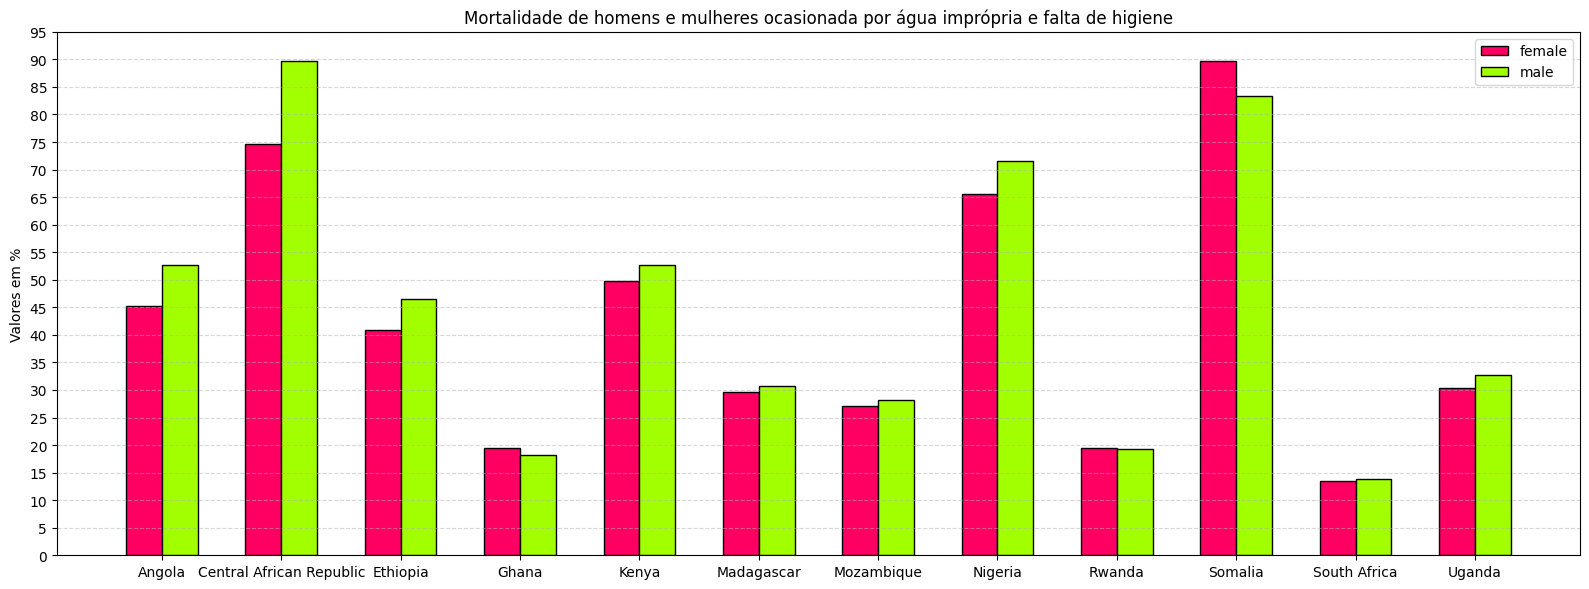

In [58]:
posicoes = range(len(df_unio))
largura = 0.3
fig, ax = plt.subplots(figsize=(16, 6))
barra1 = ax.bar(posicoes, df_unio["Value_x"], largura, label="female", color = "#FF0062", edgecolor = "black")
barra2 = ax.bar([p + largura for p in posicoes], df_unio["Value_y"], largura, label="male", color = "#A2FF00", edgecolor = "black")
ax.set_xticks([p + largura/2 for p in posicoes])
ax.set_xticklabels(df_unio["Country Name"])
ax.set_ylabel("Valores em %")
ax.set_title("Mortalidade de homens e mulheres ocasionada por água imprópria e falta de higiene")
ax.legend()
plt.yticks(np.arange(0, 100, 5))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()